# Comparative Analysis of Machine Learning Algorithms for Devanagari Character Classification

#### Name : Harshwardhan Patil

### Question 2

Dataset : Devanagari Character Set

Source : https://www.kaggle.com/datasets/rishianand/devanagari-character-set

First of all we will import the required libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

we will read the data from the csv file into data variable

In [3]:
%%time 
data = pd.read_csv('data.csv')

CPU times: user 6.61 s, sys: 635 ms, total: 7.25 s
Wall time: 7.29 s


Extracting lables from the data and dropping label column from the data

In [4]:
labels = data['character']
data.drop(columns=['character'], axis = 1, inplace = True)

Now, reading the training and testing data into variables `train_data` and `test_data` respectively by splitting `data` into 70-30 ratio.

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data,  labels, test_size=0.30, random_state=42)

In [6]:
train_data.shape, train_labels.shape

((64400, 1024), (64400,))

In [7]:
test_data.shape, test_labels.shape

((27600, 1024), (27600,))

In [8]:
# function to plot digits into an image format
def plot_data(image_data):
    image = image_data.reshape(32, 32)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

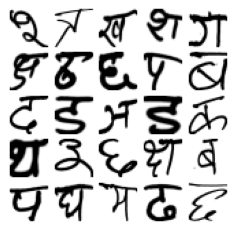

In [9]:
plt.figure(figsize=(4, 4))
for index_i, image_data in enumerate(train_data.values[:25]):
    plt.subplot(5, 5, index_i + 1)
    plot_data(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

There are 1024 of features present in the data. Which is very high, so We can use PCA to do dimentionality reduction and try to reduce the number of features.

# Implementing PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=0.96)
pca.fit(train_data)

PCA(n_components=0.96)

Now, we will check what is the fir going to be like with 4% varience and the number of principle components present in the data.

In [12]:
# Transform training and testing data using PCA
train_dataset = pd.DataFrame(pca.transform(train_data))
test_dataset = pd.DataFrame(pca.transform(test_data))

In [13]:
train_dataset.shape, test_dataset.shape

((64400, 201), (27600, 201))

Here, the features are reduced from 1024 to 201 with 4% variance. Let's use the next perfect square number for features.

In [14]:
pca = PCA(n_components=225)
pca.fit(train_data)
# Transform training and testing data using PCA
train_data = pd.DataFrame(pca.transform(train_data))
test_data = pd.DataFrame(pca.transform(test_data))

In [15]:
train_data_recovered = pd.DataFrame(pca.inverse_transform(train_data))

In [16]:
train_data_recovered.shape

(64400, 1024)

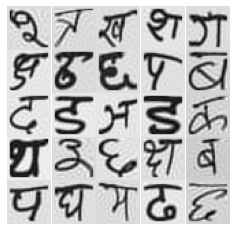

In [17]:
plt.figure(figsize=(4, 4))
for index_i, image_data in enumerate(train_data_recovered.values[:25]):
    plt.subplot(5, 5, index_i + 1)
    plot_data(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

The recodered images looks preety good.

Now we will start with the classification

# 1. Multinomial Logistic Regression

Here, I wish to test impact of regularization parameter and penalty on the logistic regression model.

In [19]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [20]:
#initializing a logistic regression model
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1)

In [21]:
# declaring a parameter grid 
param_grid = {
    'C': [0.5, 1, 5, 10],
    'penalty': ['l1', 'l2']
}


In [22]:
%%time 
grid_search = GridSearchCV(logistic_reg_model, param_grid, n_jobs=-1)

CPU times: user 63 µs, sys: 66 µs, total: 129 µs
Wall time: 135 µs


In [23]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 14min 51s, sys: 3.64 s, total: 14min 55s
Wall time: 27min 42s


GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', n_jobs=-1,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [24]:
# Print the best hyperparameters
MLR_parameters = grid_search.best_params_
print("Best hyperparameters:", MLR_parameters)

Best hyperparameters: {'C': 0.5, 'penalty': 'l1'}


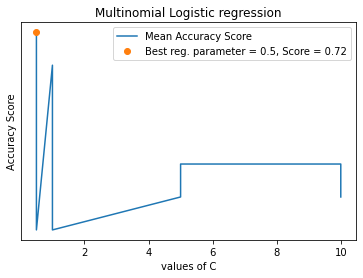

In [25]:
result = pd.DataFrame.from_dict(grid_search.cv_results_)
x, y = grid_search.best_params_['C'], grid_search.best_score_
text = 'Best reg. parameter = {}, Score = {}'.format(x, round(y,2))

plt.figure()
plt.title('Multinomial Logistic regression')
plt.xlabel('values of C')
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0.6, 0.81, 0.02))

plt.plot(result.param_C, result.mean_test_score, label='Mean Accuracy Score')
plt.plot(x, y, 'o', label=text)

plt.legend()

In [26]:
# predicting the test data
test_labels_pred = grid_search.predict(test_data)

In [27]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

                           precision    recall  f1-score   support

          character_01_ka       0.79      0.76      0.77       605
         character_02_kha       0.60      0.57      0.58       591
          character_03_ga       0.71      0.66      0.68       567
         character_04_gha       0.65      0.63      0.64       603
         character_05_kna       0.66      0.64      0.65       618
         character_06_cha       0.72      0.78      0.75       598
        character_07_chha       0.65      0.63      0.64       566
          character_08_ja       0.80      0.80      0.80       601
         character_09_jha       0.79      0.76      0.78       594
         character_10_yna       0.77      0.77      0.77       570
    character_11_taamatar       0.76      0.82      0.79       621
        character_12_thaa       0.79      0.83      0.81       567
         character_13_daa       0.69      0.64      0.67       605
        character_14_dhaa       0.75      0.80      0.77     

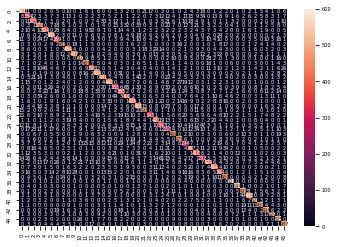

In [28]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [29]:
# Printing necessary evaluation metrics
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.7200127263943878
Precision Score: 0.722463768115942
Recall Score: 0.722463768115942
F1 Score: 0.7203337747315225


So using soft-max regression, we got around 72% accuracy which is preety decent.

# 2. Support Vector Machines

## 2.1. Using Linear Kernal

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
# initialising parameter grid
param_grid = {'C':  [0.5, 1, 5, 10]}

In [32]:
linear_svm = SVC(kernel='linear', max_iter = 10000)

In [33]:
%%time 
grid_search = GridSearchCV(linear_svm, param_grid, n_jobs=-1,verbose=1)

CPU times: user 34 µs, sys: 13 µs, total: 47 µs
Wall time: 56.7 µs


In [34]:
%%time 
grid_search.fit(train_data, train_labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 1min 12s, sys: 2.64 s, total: 1min 15s
Wall time: 5min


GridSearchCV(estimator=SVC(kernel='linear', max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10]}, verbose=1)

In [35]:
# printing the best hyperparameters
SVM_linear_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_linear_parameters)

Best hyperparameters: {'C': 0.5}


In [36]:
# predicting labels on the test data
test_labels_pred = grid_search.predict(test_data)

In [37]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

                           precision    recall  f1-score   support

          character_01_ka       0.79      0.89      0.84       605
         character_02_kha       0.57      0.68      0.62       591
          character_03_ga       0.67      0.67      0.67       567
         character_04_gha       0.49      0.65      0.56       603
         character_05_kna       0.60      0.69      0.65       618
         character_06_cha       0.75      0.87      0.81       598
        character_07_chha       0.69      0.65      0.67       566
          character_08_ja       0.74      0.88      0.80       601
         character_09_jha       0.83      0.86      0.84       594
         character_10_yna       0.73      0.77      0.75       570
    character_11_taamatar       0.78      0.91      0.84       621
        character_12_thaa       0.73      0.89      0.80       567
         character_13_daa       0.69      0.67      0.68       605
        character_14_dhaa       0.76      0.85      0.80     

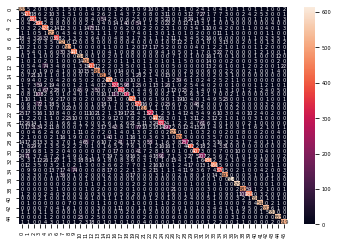

In [38]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [39]:
# printing evaluation parameters based on test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.7371023728862371
Precision Score: 0.7404347826086957
Recall Score: 0.7404347826086957
F1 Score: 0.7354653575761502


In the linear SVM model, we have used 3 regualarization parameters(C_values) for which C = 0.5 gave the best results on validation data. Thus, this model was used for further executing on the test data. For C= 0.5, the f1_score given by the model is 0.735.

## 2.2. Using Polynomial Kernal

In [40]:
#importing libraries
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
# initializing parameter grid
param_grid = { 'C':  [0.5, 1, 5, 10], 
               'degree': [2, 3, 4], 
               'coef0': [0.1, 1, 10]
             }

In [42]:
# declaring a model
polynomial_svm = SVC(kernel='poly', max_iter = 10000)

In [43]:
%%time 
grid_search = GridSearchCV(polynomial_svm, param_grid, n_jobs=-1)

CPU times: user 21 µs, sys: 8 µs, total: 29 µs
Wall time: 34.1 µs


In [44]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 2min 40s, sys: 4.7 s, total: 2min 44s
Wall time: 1h 37min 42s


GridSearchCV(estimator=SVC(kernel='poly', max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'coef0': [0.1, 1, 10],
                         'degree': [2, 3, 4]})

In [45]:
# printing the best hyperparameters
SVM_polynomial_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_polynomial_parameters)

Best hyperparameters: {'C': 10, 'coef0': 0.1, 'degree': 3}


In [46]:
# predicting the test data
test_labels_pred = grid_search.predict(test_data)

In [47]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

                           precision    recall  f1-score   support

          character_01_ka       0.98      0.98      0.98       605
         character_02_kha       0.96      0.98      0.97       591
          character_03_ga       0.98      0.96      0.97       567
         character_04_gha       0.93      0.93      0.93       603
         character_05_kna       0.95      0.93      0.94       618
         character_06_cha       0.97      0.97      0.97       598
        character_07_chha       0.95      0.96      0.95       566
          character_08_ja       0.98      0.98      0.98       601
         character_09_jha       0.99      0.97      0.98       594
         character_10_yna       0.97      0.97      0.97       570
    character_11_taamatar       0.97      0.97      0.97       621
        character_12_thaa       0.95      0.98      0.96       567
         character_13_daa       0.94      0.94      0.94       605
        character_14_dhaa       0.96      0.96      0.96     

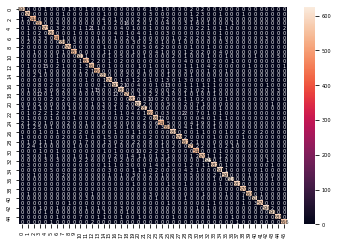

In [48]:
# plotting confusion matrix
plt.rc('font', size=5)
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [49]:
# printing scores on the test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.9632633536522535
Precision Score: 0.9630797101449275
Recall Score: 0.9630797101449275
F1 Score: 0.9631158881989191


Wohhh!! 96.3% accuracy on the test data. I would loved to see, what impact does the regularization parameter have when 'coef0': 0.1, 'degree': 3 kept constant. Given time, I would like to go from with range(9.1, 20.0, 0.1)

## 2.3. Using RBF Kernal

In [50]:
# using rbf kernal
rbf_svm = SVC(kernel='rbf', max_iter = 10000)

In [51]:
# printing parameter grid
param_grid = { 'C':  [0.5, 1, 5, 10], 
               'gamma': [0.01, 0.1, 1]
             }

In [52]:
grid_search = GridSearchCV(rbf_svm, param_grid, n_jobs=-1)

In [53]:
%%time 
grid_search.fit(train_data, train_labels)

CPU times: user 15min 33s, sys: 4.84 s, total: 15min 38s
Wall time: 1h 23min 14s


GridSearchCV(estimator=SVC(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.5, 1, 5, 10], 'gamma': [0.01, 0.1, 1]})

In [54]:
%%time 
SVM_rbf_parameters = grid_search.best_params_
print("Best hyperparameters:", SVM_rbf_parameters)

Best hyperparameters: {'C': 1, 'gamma': 0.01}
CPU times: user 58 µs, sys: 11 µs, total: 69 µs
Wall time: 63.7 µs


In [55]:
# predicting the test labels using grid search
test_labels_pred = grid_search.predict(test_data)

In [56]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

                           precision    recall  f1-score   support

          character_01_ka       0.00      0.00      0.00       605
         character_02_kha       0.00      0.00      0.00       591
          character_03_ga       0.00      0.00      0.00       567
         character_04_gha       0.00      0.00      0.00       603
         character_05_kna       0.00      0.00      0.00       618
         character_06_cha       0.00      0.00      0.00       598
        character_07_chha       0.00      0.00      0.00       566
          character_08_ja       0.00      0.00      0.00       601
         character_09_jha       0.00      0.00      0.00       594
         character_10_yna       0.00      0.00      0.00       570
    character_11_taamatar       0.00      0.00      0.00       621
        character_12_thaa       0.00      0.00      0.00       567
         character_13_daa       0.00      0.00      0.00       605
        character_14_dhaa       0.00      0.00      0.00     

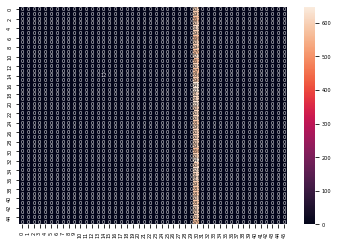

In [57]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [58]:
# printing scores on test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.022087396746747694
Precision Score: 0.020942028985507247
Recall Score: 0.020942028985507247
F1 Score: 0.001677002701075929


Well this is unfortunate! It seems like before converging to a good parameter, the number of max_iterations reached. This is the lowest accurcy score. and as it takes more time, we will discard this model.

From the all the above 3 svm models, we can see that the polynomial SVM model performed the best, with around 90% accuracy on the test data. Also, one of the thing that I noticed is, the runtime for polynomial kernal is less than models with rbf kernal and linear kernal. 

# 3.Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# initialising the model
rfc_model = RandomForestClassifier()

In [61]:
# declaring the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
%%time 
grid_search = GridSearchCV(rfc_model, param_grid, n_jobs=-1, verbose=1)

CPU times: user 25 µs, sys: 4 µs, total: 29 µs
Wall time: 33.9 µs


In [63]:
%%time 
grid_search.fit(train_data, train_labels)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
CPU times: user 5min 28s, sys: 3.03 s, total: 5min 31s
Wall time: 19min 9s


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [64]:
# printing the best hyperparameters
rfc_parameters = grid_search.best_params_
print("Best hyperparameters:", rfc_parameters)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [65]:
# predicting the test labels
test_labels_pred = grid_search.predict(test_data)

In [66]:
# printing the classification report
print(classification_report(test_labels, test_labels_pred))

                           precision    recall  f1-score   support

          character_01_ka       0.92      0.90      0.91       605
         character_02_kha       0.86      0.80      0.83       591
          character_03_ga       0.85      0.83      0.84       567
         character_04_gha       0.80      0.72      0.76       603
         character_05_kna       0.82      0.78      0.80       618
         character_06_cha       0.87      0.87      0.87       598
        character_07_chha       0.82      0.79      0.80       566
          character_08_ja       0.84      0.86      0.85       601
         character_09_jha       0.91      0.91      0.91       594
         character_10_yna       0.86      0.86      0.86       570
    character_11_taamatar       0.82      0.91      0.86       621
        character_12_thaa       0.85      0.89      0.87       567
         character_13_daa       0.79      0.76      0.77       605
        character_14_dhaa       0.81      0.84      0.82     

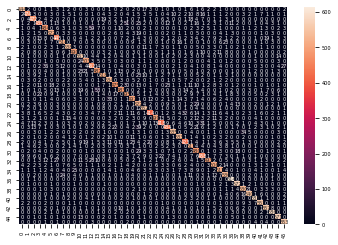

In [67]:
# plotting the confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [68]:
# printing scores on the test data
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.8491094503734231
Precision Score: 0.8483333333333334
Recall Score: 0.8483333333333334
F1 Score: 0.8473016850484993


The model does preety good job in fitting the data and gives good results on the test data. Also, the run time was very less compared to the other SVM models. Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}. 

#### Feature Importance

In [69]:
rfc_parameters

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [70]:
rfc_model = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], 
                             max_depth=rfc_parameters['max_depth'], 
                             min_samples_leaf = rfc_parameters['min_samples_leaf'], 
                             min_samples_split = rfc_parameters['min_samples_split'], 
                             n_jobs= -1)

In [71]:
rfc_model.fit(train_data, train_labels)

RandomForestClassifier(min_samples_split=5, n_estimators=200, n_jobs=-1)

In [72]:
important_features = rfc_model.feature_importances_

# Get the indices of the top 10 features
feature_indices = np.argsort(important_features)[::-1][:10]

# Print the top 10 features and their importances
print("Top 10 features and their importances for Hard Voting Classifier:")
for index_i in feature_indices:
    print("{}: {:.4f}".format(index_i, important_features[index_i]))

Top 10 features and their importances for Hard Voting Classifier:
2: 0.0250
3: 0.0239
5: 0.0231
4: 0.0228
1: 0.0210
9: 0.0204
10: 0.0189
7: 0.0183
6: 0.0180
8: 0.0162


we will plot the heatmap for viewing important pixels in the image, which potentially can be used for training the data more effectively.

<AxesSubplot:>

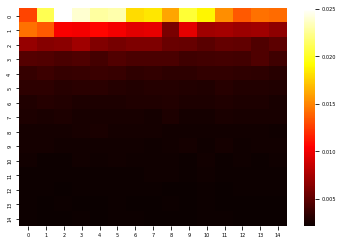

In [73]:
import seaborn as sns
sns.heatmap(rfc_model.feature_importances_.reshape(15,15), cmap = 'hot')

Looking at the above results it looks like, the first 6-7 rows of pixel only have the higher importance for predicting the test output.  

# 4.Ensamble learning

In [74]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [75]:
# we will use the 3 models to do the ensamble learning
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', C=MLR_parameters['C'], penalty=MLR_parameters['penalty'], n_jobs= -1)
svm_polynomial = SVC(kernel='poly', C = SVM_polynomial_parameters['C'], degree=SVM_polynomial_parameters['degree'], coef0=SVM_polynomial_parameters['coef0'],probability=True, max_iter = 10000)
rfc_model = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], 
                             max_depth=rfc_parameters['max_depth'], 
                             min_samples_leaf = rfc_parameters['min_samples_leaf'], 
                             min_samples_split = rfc_parameters['min_samples_split'], 
                             n_jobs= -1)

#### first of all, we will use hard voting technique to observe the results

### Hard Voting

In [76]:
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_polynomial), 
                                                 ('randomforest', rfc_model)], voting='hard')

In [77]:
%%time 
voting_classifier.fit(train_data, train_labels)

CPU times: user 13min 40s, sys: 13.7 s, total: 13min 53s
Wall time: 29min 3s


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.5,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga')),
                             ('svm',
                              SVC(C=10, coef0=0.1, kernel='poly',
                                  max_iter=10000, probability=True)),
                             ('randomforest',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=200,
                                                     n_jobs=-1))])

In [78]:
test_labels_pred = voting_classifier.predict(test_data)

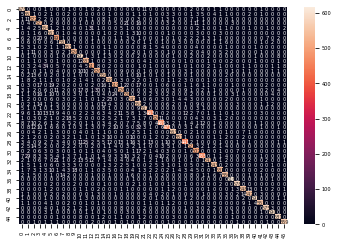

In [79]:
#plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [80]:
# printing scores
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.9007357017402859
Precision Score: 0.8981884057971015
Recall Score: 0.8981884057971015
F1 Score: 0.8979251206091644


#### Now, we will use soft voting technique to observe the evaluation metrics

### Soft Voting

In [81]:
# Create an ensemble of the three classifiers
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_polynomial),
                                                 ('randomforest', rfc_model)], 
                                     voting='soft')

In [82]:
%%time 
voting_classifier.fit(train_data, train_labels)

CPU times: user 13min 40s, sys: 8.79 s, total: 13min 49s
Wall time: 29min 7s


VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=0.5,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, penalty='l1',
                                                 solver='saga')),
                             ('svm',
                              SVC(C=10, coef0=0.1, kernel='poly',
                                  max_iter=10000, probability=True)),
                             ('randomforest',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=200,
                                                     n_jobs=-1))],
                 voting='soft')

In [83]:
# predicting test labels
test_labels_pred = voting_classifier.predict(test_data)

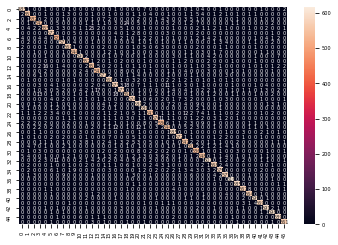

In [84]:
# plotting confusion matrix
plt.rc('font', size=5)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [85]:
# printing scores
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

Accuracy Score:  0.9453419921608737
Precision Score: 0.9452898550724638
Recall Score: 0.9452898550724638
F1 Score: 0.9452003769430756


Soft voting gives high accuracy than the hard voting model on test data and costs around the same time.

## More things I wanted to do

1. We have tested the models on limited no of parameters, an extensive search could be done.
2. We have used grid search to find the best fitted parameters within given arbitrarily chosen values. After finding the best fitted values, we would have loved to test how the efficiency and accuracy varies with smaller increase or decrease in hyperparameters.  
3. For the results, we have plotted only the confusion matrix. I would love to check how the validation curve varies as we tune the hyperparameters.
4. I would also like to see hyperparameter tuning in the Polynomial SVM model and the random forest model and the difference between their accuracy.

# References:

[1] Geron, A. (2019). Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly Media.

[2] API Reference. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/classes.html

[3] API Reference. (n.d.). Pandas. https://pandas.pydata.org/docs/user_guide/index.html

[4] API Reference. (n.d.). NumPy. https://numpy.org/doc/stable/user/index.html#user

[5] Some inference from notebooks on https://github.com/ageron/handson-ml3